In [1]:
# This is query for the Gini Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/casper_data/curated/SSC/"
path2="/mnt/indexer-build/migrated_data/casper_data/curated/entity/"

In [3]:
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [4]:
all_files = glob.glob(path + "/*/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
all_files2 = glob.glob(path2 + "/*/*.csv")

li2 = []

for filename1 in all_files2:
    df2 = pd.read_csv(filename1, index_col=None, header=0)
    li2.append(df2)

frame2 = pd.concat(li2, axis=0, ignore_index=True)

In [6]:
frame = pd.merge(frame2, frame, on=["time_week"])

In [7]:
frame["year"]=frame.time_week.apply(extractorYear)
frame["week"]=frame.time_week.apply(extractorWeek)
final1 = frame.sort_values(by=['year','week'])

In [8]:
extra = final1[((final1.year == 2018) & (final1.week < 26)) | ((final1.year == 2022) & (final1.week > 34))]

In [9]:
df = pd.merge(final1, extra, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [10]:
df

,max_count_entity,avg_address_per_entity,total_labels,time_week,Total_Vertices_x,max_count,Total_Vertices_y,year,week
0,1,1.000000,2,202117,2,1,2,2021,17
1,9,2.333333,12,202118,28,4,28,2021,18
2,4141,320.785714,14,202119,4491,3297,4491,2021,19
3,324,69.764706,17,202120,1186,267,1186,2021,20
4,156,17.411765,17,202121,296,84,296,2021,21
...,...,...,...,...,...,...,...,...,...
65,396,14.803922,102,202230,1510,790,1510,2022,30
66,343,7.728972,107,202231,827,110,827,2022,31
67,311,7.511628,129,202232,969,148,969,2022,32
68,184,8.894231,104,202233,925,294,925,2022,33


In [11]:
df["entity_ratio"] = (df.max_count_entity / df.Total_Vertices_x) * 100
df["SSC_ratio"] = (df.max_count / df.Total_Vertices_x) * 100

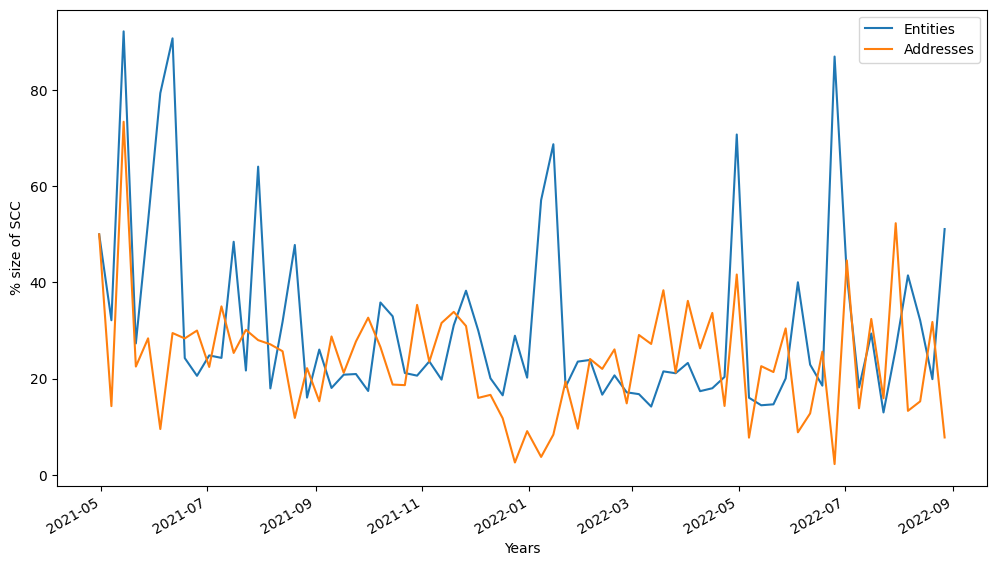

In [12]:
# Determine the date
df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
df.plot(x='date', y='entity_ratio', ax=ax, figsize=(12,7))
df.plot(x='date', y='SSC_ratio', ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('% size of SCC')
ax.legend(['Entities','Addresses'])

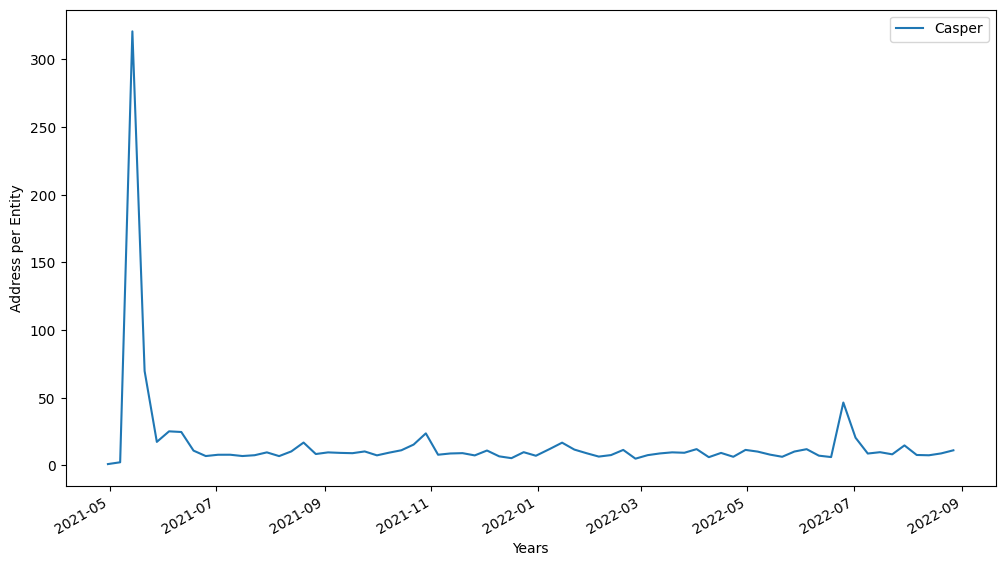

In [14]:
# Plot
fig2, ax2 = plt.subplots()
df.plot(x='date', y='avg_address_per_entity', ax=ax2, figsize=(12,7))
ax2.set_xlabel('Years')
ax2.set_ylabel('Address per Entity')
ax2.legend(['Casper'])